# Has the COVID-19 pandemic changed the way emojis are used?

Emojis can be represented in many ways, and mean many things. It is difficult to pin down exactly what an emoji means, as they can reflect different things to different people, and vary based on the platform they are being used on. Looking at the image below, we can begin to understand this problem. What for one user on platform A appears to be someone sweaty after exercise, appears to another user on platform B as someone under duress.

This leads to the conclusion that emojis are best not understood by their visual representations, but rather by how people use them. To that end, we may ask ourselves whether the meaning of emojis changes over time, as people use them differently. Considering the impact that the COVID-19 pandemic had on our lives, this motivates that the pandemic may have changed how we use emojis, and what they mean to us. What in 2019 may have referred to a doctor wearing a surgical mask, may in 2020 have referred to going to do grocery shopping.

For that reason, this blogpost pins down how COVID-19 changed the way we use emojis. This will be done using natural language processing, by establishing the sentiment of specific emojis before the pandemic, and today. The sentiment will be mined from tweets from Twitter, which are gathered using both a pre-existing scraped dataset, as well as live-scraped data. The sentiment is calculated using Vader analysis. The sentiment analysis results are analysed by inspecting the top largest changes in sentiment, as well as performing statistical tests to determine whether the change in sentiment in emoji use overall is significant. The results find that emoji use post-pandemic is considerably less positive than before, with the changes in sentiment being more skewed towards increases in neutrality over increases in negativity.

<center><img src="https://www.howtogeek.com/wp-content/uploads/2022/02/different-emoji.png?height=200p&trim=2,2,2,2" alt="drawing" width="600"/></center>


## Overview

In order to create a plan of action, we will identify problems and come up with solutions to those problems.

**Emojis**
- Problem: According to the Unicode Subcommittee, there are 3663 emojis, of which the top 100 make up 82% of all emoji use **[1]**. This is an infeasible number of emojis to process.
  - Solution: We can reduce our analysis to the top 100 most popular emojis. Going by the usage statistic quoted above, this will still reflect most emoji use, and thus it will not affect the validity of our analysis.
- Problem: Do the top 100 most popular emojis change between years? How will we factor that in to our emoji selection?
  - Solution: We can combine the top 100 from multiple years. Assuming that there is a large amount of overlap, our reduced emoji set will still be a manageable size.
- Problem:  Where will we get this information regarding emoji popularity from?
  - Solution: The Unicode Subcommittee periodically releases information regarding the popularity of emojis. We can use one year before the pandemic, and one year after the start of it, as our emoji datasets. This data can be found [here](https://drive.google.com/drive/folders/18u0N7OOjbP-V2YolddTPaMojhNFavmmF).

**Pre-Pandemic Sentiment Analysis**
- Problem: We need a text-based dataset, written by normal people, where the data is from before the pandemic.
  - Solution: We can use Twitter to scrape tweets that use emojis.
- Problem: The free tier Twitter API only allows tweets from the past 7 days to be pulled.
  - Solution: We can use a dataset of scraped tweets made before the pandemic. Such a dataset can be found [here](https://www.kaggle.com/datasets/rexhaif/emojifydata-en?resource=download).
- Problem: We only want English tweets, and we want the tweets cleaned of any unusable text.
  - Solution: The dataset we have chosen is of only English tweets, and is cleaned of hashtags, user @s, and links.
- Problem: We want to mine the sentiment of each emoji based on the tweets in our dataset.
  - Solution: We can use Vader **[2]** sentiment analysis to do the sentiment mining. We can map the sentiment of each tweet to the emojis that are present in the text, and aggregate the sentiment data that way.

**Post-Pandemic Sentiment Analysis**
- Problem: We need a text-based dataset, written by normal people, where the data is after the start of the pandemic.
  - Solution: We can use Twitter to scrape tweets that use emojis. We can use the free tier API and get live data.
- Problem: We only want English tweets, and we want the tweets cleaned of any unusable text.
  - Solution: We can use the API to query only English tweets, and we can clean the rest using regex.
- Problem: We want to mine the sentiment of each emoji based on the tweets in our dataset.
  - Solution: We can solve this in the same way as the pre-pandemic dataset.

**Result Analysis**
- Problem:  We want to determine whether the sentiment of emojis has changed over the pandemic.
  - Solution: We can manually inspect the emojis with the greatest changes in sentiment.
- Problem: What about the rest of the emojis?
  - Solution: We can graph the changes of all emojis to reflect the overall trend in changes.
- Problem: Can we trust ourselves to accurately interpret the data?
  - Solution: We can implement statistical tests to determine whether our intuitions are backed by statistics.



## Selecting the emojis
Using the [data provided](https://drive.google.com/drive/folders/18u0N7OOjbP-V2YolddTPaMojhNFavmmF
) by the Unicode Subcommittee, we can find the top 100 most popular emojis from 2019 and 2021. These years work well, being the year right before the pandemic, and the year right after it started.  As we are considering two different years' data, we will take the top 100 from both years and merge the two lists. Additionally, it would be interesting to look at emojis that had the largest change in popularity between the two datasets. For that purpose, we will also consider the top 10 emojis with the largest popularity changes.


In [1]:
import pandas as pd
import warnings
# disabling two warnings for false positives and clutter
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# read in emoji popularity data from 2019 and 2021
df_emoji_2019 = pd.read_csv("../data/2019_ranked.tsv", sep="\t")
df_emoji_2021 = pd.read_csv("../data/2021_ranked.tsv", sep="\t")

In [2]:
# What does 2019 look like?
df_emoji_2019.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name
0,\x{1F602},1,😂,2014,Smileys & Emotion,face-smiling,face with tears of joy
1,\x{2764 FE0F},2,❤️,1995,Smileys & Emotion,emotion,red heart
2,\x{1F60D},3,😍,2014,Smileys & Emotion,face-affection,smiling face with heart-eyes
3,\x{1F923},4,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing
4,\x{1F60A},5,😊,2014,Smileys & Emotion,face-smiling,smiling face with smiling eyes


In [3]:
# What does 2021 look like?
df_emoji_2021.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face


Let's explore the dataset. Most importantly, we want to find out if there are emojis in one dataset not present in the other.

In [4]:
# Are there emojis in the 2019 dataset not in the 2021 dataset?
emojis_2019 = df_emoji_2019['Emoji'].tolist()
df_emoji_2021.query("Emoji not in @emojis_2019")

,Hex,Rank,Emoji,Year,Category,Subcategory,Name


In [5]:
# Are there emojis in the 2021 dataset not in the 2019 dataset?
emojis_2021 = df_emoji_2021['Emoji'].tolist()
df_emoji_2019.query("Emoji not in @emojis_2021")

,Hex,Rank,Emoji,Year,Category,Subcategory,Name


As both datasets contain the same emojis, we integrate the 2019 dataset into our 2021 dataset, and from then on we will only have to work with one dataset.

In [6]:
# pulling 2019 rank information into 2021 dataset
def get_2019_rank(emoji):
    try:
        return df_emoji_2019[df_emoji_2019['Emoji'] == emoji]['Rank'].values[0]
    except:
        return None

df_emoji_2021['Rank_2019'] = df_emoji_2021['Emoji'].map(lambda x: get_2019_rank(x))

Now we can calculate the change in popularity

In [7]:
df_emoji_2021['Rank_Change'] = abs(df_emoji_2021['Rank'] - df_emoji_2021['Rank_2019'])

Finally, we can select the emojis we want to keep, and reduce our dataset to those rows only

In [8]:
top_2019 = df_emoji_2021[df_emoji_2021['Rank_2019'] <= 100]['Emoji'].tolist()
top_2021 = df_emoji_2021[df_emoji_2021['Rank'] <= 100]['Emoji'].tolist()
top_changed = df_emoji_2021.sort_values(by='Rank_Change').head(10)['Emoji'].tolist()
combined_emojis = top_2019 + top_2021 + top_changed

df_emojis_reduced = df_emoji_2021.query("Emoji in @combined_emojis")
# get a unique set of all emojis in our reduced set
emojis = df_emojis_reduced['Emoji'].tolist()
emojis

['😂',
 '❤️',
 '🤣',
 '👍',
 '😭',
 '🙏',
 '😘',
 '🥰',
 '😍',
 '😊',
 '🎉',
 '😁',
 '💕',
 '🥺',
 '😅',
 '🔥',
 '☺️',
 '🤦',
 '♥️',
 '🤷',
 '🙄',
 '😆',
 '🤗',
 '😉',
 '🎂',
 '🤔',
 '👏',
 '🙂',
 '😳',
 '🥳',
 '😎',
 '👌',
 '💜',
 '😔',
 '💪',
 '✨',
 '💖',
 '👀',
 '😋',
 '😏',
 '😢',
 '👉',
 '💗',
 '😩',
 '💯',
 '🌹',
 '💞',
 '🎈',
 '💙',
 '😃',
 '😡',
 '💐',
 '😜',
 '🙈',
 '🤞',
 '😄',
 '🤤',
 '🙌',
 '🤪',
 '❣️',
 '😀',
 '💋',
 '💀',
 '👇',
 '💔',
 '😌',
 '💓',
 '🤩',
 '🙃',
 '😬',
 '😱',
 '😴',
 '🤭',
 '😐',
 '🌞',
 '😒',
 '😇',
 '🌸',
 '😈',
 '🎶',
 '✌️',
 '🎊',
 '🥵',
 '😞',
 '💚',
 '☀️',
 '🖤',
 '💰',
 '😚',
 '👑',
 '🎁',
 '💥',
 '🙋',
 '☹️',
 '😑',
 '🥴',
 '👈',
 '💩',
 '✅',
 '👋',
 '🌟',
 '❗',
 '😥',
 '🌈',
 '💛',
 '😝',
 '‼️',
 '🌻',
 '💃',
 '👊',
 '🍀',
 '⭐',
 '🤘',
 '🌷',
 '😓',
 '😻',
 '✋',
 '😪',
 '📗',
 '👨\u200d👦\u200d👦',
 '🇨🇽']

# Pre-pandemic dataset

As we want large amounts of freely available text data, Twitter is a good source. As we want data from before the pandemic, we will not be able to use the Twitter API. The free tier API only returns tweets from the past 7 days. We also want to think of restrictions. We do not want to include tweets which don't contain emojis, nor tweets which our NLP model will not be able to understand. For that reason, we will only be considering English tweets with emojis in them. Luckily enough, there is a pre-prepared dataset of emoji-based Tweets scraped pre-COVID. The [EmojifyData-EN](https://www.kaggle.com/datasets/rexhaif/emojifydata-en?resource=download) dataset provides 18 million English tweets, and was last updated in 2018, just before the pandemic.

As this dataset is prepared, it has already been cleaned. Quoting the original authors: "The original files for this dataset was four archives from ArchiveTeam TwitterStream project. We reformatted these files, selected all the english-language tweets with at least one emoji. Also there was some ordinary preprocessing: removing hashtags, urls, mentions."

As the total dataset is huge, we've prepared a subset of the dataset for the purposes of this example. It would be possible to use the whole dataset, but each individual processing step would take very long. As such, our dataset contains a random sample of 500 000 tweets.

In [9]:
#reading in the sampled dataset
df_tweets_2018 = pd.read_csv("../data/tweets.csv")
df_tweets_2018.sample(5)

,tweet
89839,Bro....that long pause when they showed the sk...
374687,Your enthusiasm and support were awesome 🇦🇷
10868,"My happiness, I love you more than anything in..."
381283,My bitch ass cousin and bestfriend keep puttin...
73365,Your welcome 🤷🏽‍♀️


With our tweets, we want to calculate the sentiment of each tweet. The code cell below will map every tweet to sentiment scores for negative sentiment, positive sentiment, neutral sentiment, and a compound sentiment score. This is done using Vader sentiment analysis **[2]**, implemented by the [Natural Language Toolkit](https://www.nltk.org/).

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# if the tweet contain no text, vader will fail. Therefore, we will catch errors and return None
def get_sentiment(tweet):
    sid = SentimentIntensityAnalyzer()
    try:
        ss = sid.polarity_scores(tweet)
    except:
        return {'neg': None, 'pos': None, 'neu': None, 'compound': None}
    return ss

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lauren/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The following cell calculates the sentiment for each tweet. As this is NLP, it will take very long. You can execute the code cell below if you would like to have the authentic experience, but we've prepared a fast-track option. If you skip this cell, and execute the following cell, you can load in the tweet data with sentiments pre-calculated.

In [ ]:
df_tweets_2018[['neg', 'pos', 'neu', 'compound']] = df_tweets_2018['tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
df_tweets_2018.sample(5)

In [11]:
df_tweets_2018 = pd.read_csv("../data/tweets_2018_with_sentiment.csv")
df_tweets_2018.sample(5)

,tweet,neg,pos,neu,compound
403746,Same 🌚,0.000,1.000,0.000,0.0000
113689,We need to work harder this comeback. Nicki mi...,0.100,0.900,0.000,-0.2732
171239,"Your smile, It's all that matters ❤️",0.000,0.581,0.419,0.3818
268332,So I know you’re outta the game but I’m asking...,0.000,0.718,0.282,0.8338
293547,Missing already! 💗🌸💗🌸💗🌸💗🌸💗🌸💗🌸,0.555,0.445,0.000,-0.3595


Let's check if any of the sentiment analysis failed. Using `missingno`, we can easily identify null values in our dataframe. Seeing as we know what null represents - failed sentiment analysis - this is a very easy way of identifying potential problems.

<AxesSubplot:>

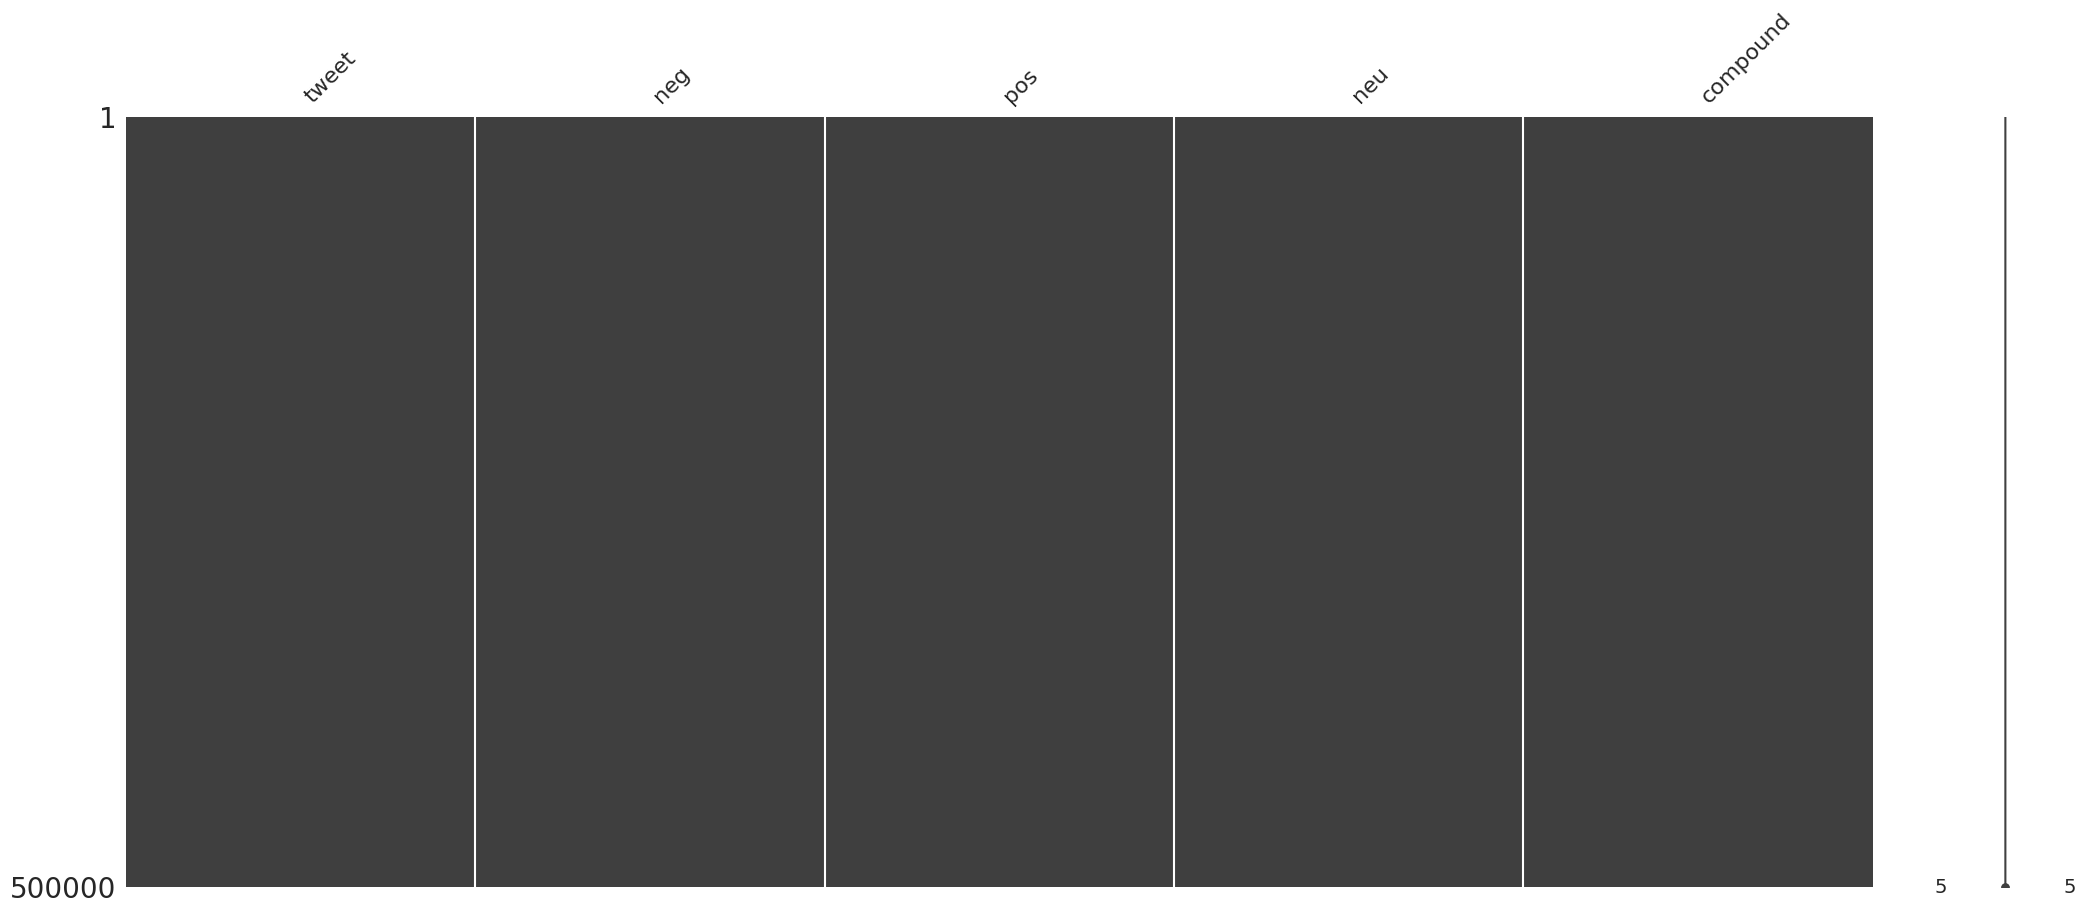

In [12]:
import missingno as msno

msno.matrix(df_tweets_2018)

Nothing failed! That's great.

We wish to be able to know what emojis are in each of these tweets. While this requires a lot of string processing, which is slow, we can create a column for each emoji denoting where they are present.

In [13]:
def contains_emoji(tweet, emoji):
    return emoji in tweet

for emoji in emojis:
    df_tweets_2018[emoji] = df_tweets_2018['tweet'].map(lambda x: contains_emoji(x, emoji))
df_tweets_2018.sample(5)

,tweet,neg,pos,neu,compound,😂,❤️,🤣,👍,😭,...,⭐,🤘,🌷,😓,😻,✋,😪,📗,👨‍👦‍👦,🇨🇽
481963,Hmm.. Eat?🦑,0.0,1.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
311116,OHIO - VOTE JIM RENACCI FOR SENATE ON MAY 8TH!...,0.0,1.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
227026,"trump Shouldn’t 🐝Called President,Shouldn’t 🐝A...",0.0,1.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
357371,You deserve it!! 👏🏻👏🏻👏🏻,0.0,1.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
272452,ShaMira's mix😍💞,0.0,1.0,0.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


With that out of the way, we can calculate our pre-pandemic sentiment for each emoji. We will store this information in the emoji dataframe.

In [14]:
# create the column for each sentiment type
df_emojis_reduced[['neg_2018', 'pos_2018', 'neu_2018', 'compound_2018']] = 0, 0, 0, 0

for emoji in emojis:
    df_sentiments = df_tweets_2018[df_tweets_2018[emoji] == True][['neg', 'pos', 'neu', 'compound']]
    sentiments = df_sentiments.mean().tolist()
    idx = df_emojis_reduced.index[df_emojis_reduced['Emoji'] == emoji].tolist()[0]
    df_emojis_reduced.loc[idx, 'neg_2018'] = sentiments[0]
    df_emojis_reduced.loc[idx, 'pos_2018'] = sentiments[1]
    df_emojis_reduced.loc[idx, 'neu_2018'] = sentiments[2]
    df_emojis_reduced.loc[idx, 'compound_2018'] = sentiments[3]
df_emojis_reduced.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name,Rank_2019,Rank_Change,neg_2018,pos_2018,neu_2018,compound_2018
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy,1,0,0.094626,0.782723,0.122609,0.045362
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart,2,0,0.028128,0.707111,0.264762,0.366035
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing,4,1,0.101268,0.779540,0.119193,0.025818
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up,10,6,0.029890,0.718746,0.251195,0.325941
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face,8,3,0.100978,0.756502,0.142374,0.072759


Before we move on, let's take a look at what our results look like, and if some emojis do not have any sentiment results.

<AxesSubplot:>

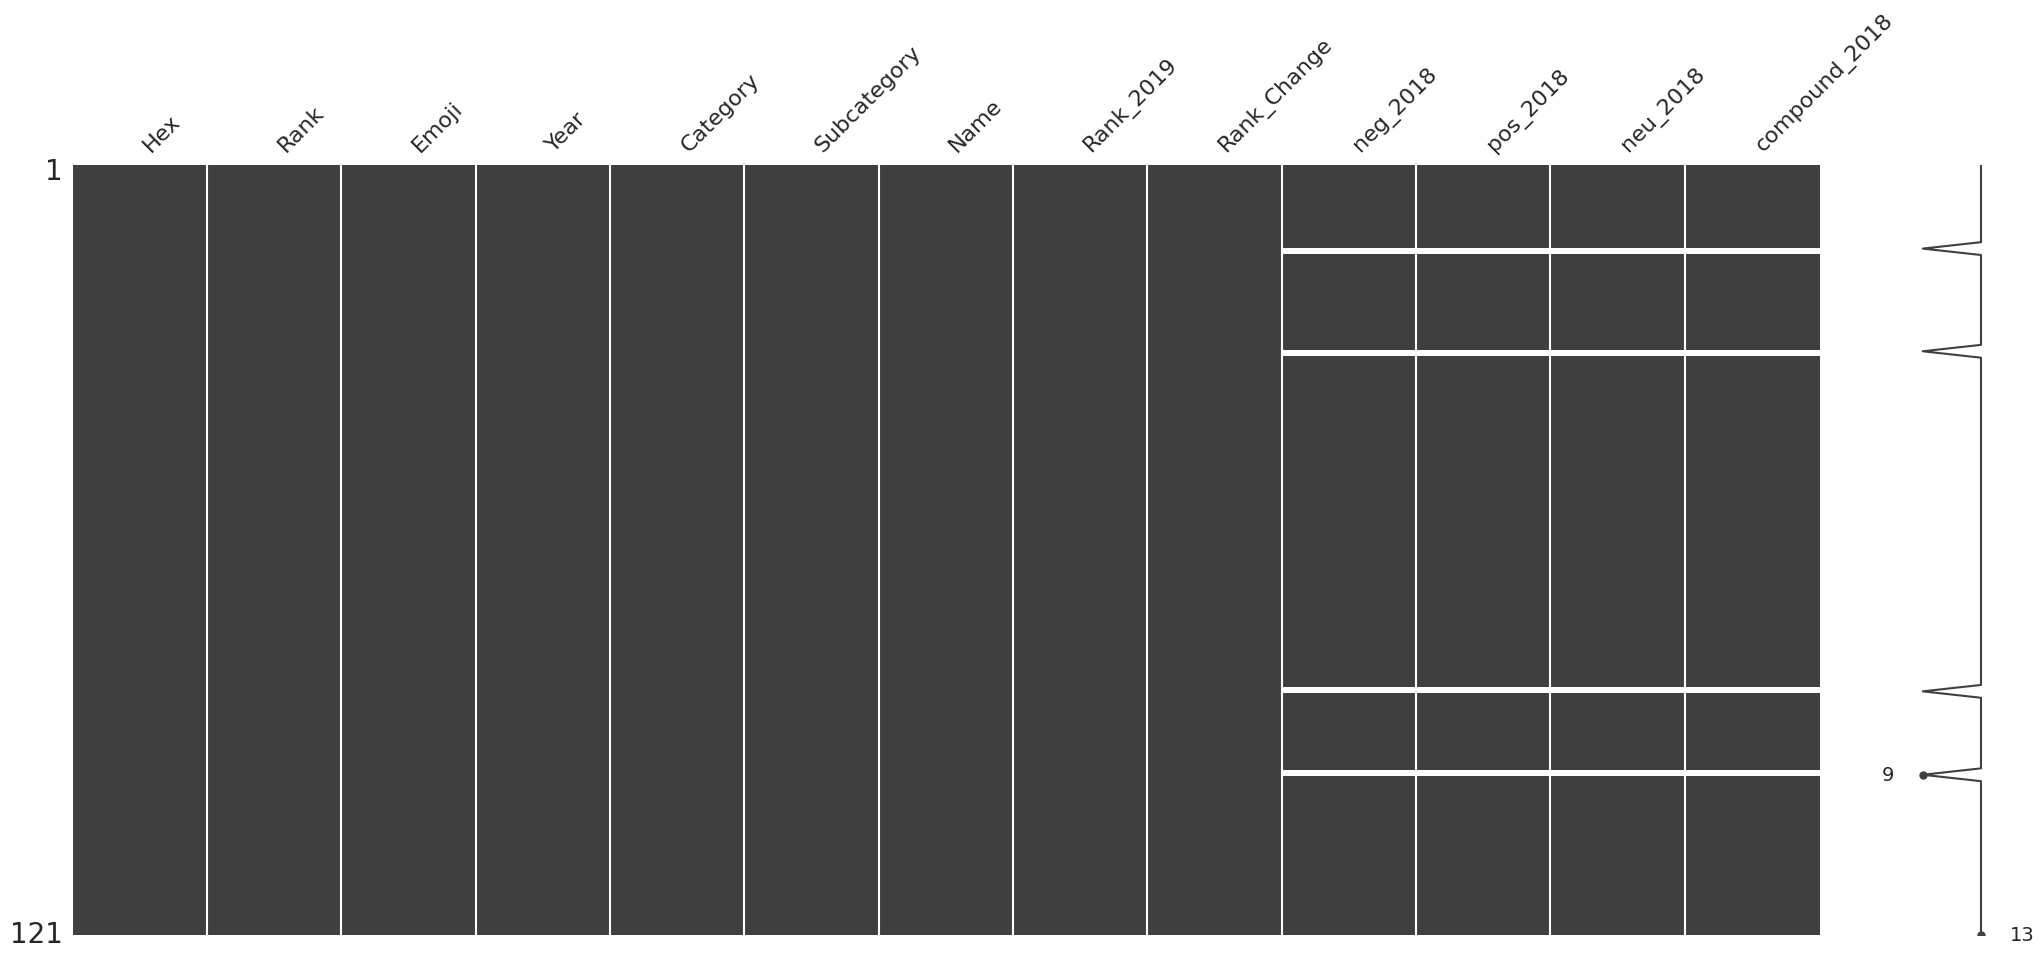

In [15]:
msno.matrix(df_emojis_reduced)

As can be seen, there are some emojis with null values in their sentiment results. Let's find out why.

In [16]:
df_emojis_reduced[df_emojis_reduced.isna().any(axis=1)]

,Hex,Rank,Emoji,Year,Category,Subcategory,Name,Rank_2019,Rank_Change,neg_2018,pos_2018,neu_2018,compound_2018
13,\x{1F97A},14,🥺,2018,Smileys & Emotion,face-concerned,pleading face,97,83,NaN,NaN,NaN,NaN
29,\x{1F973},30,🥳,2018,Smileys & Emotion,face-hat,partying face,78,48,NaN,NaN,NaN,NaN
82,\x{1F975},83,🥵,2018,Smileys & Emotion,face-unwell,hot face,236,153,NaN,NaN,NaN,NaN
95,\x{1F974},96,🥴,2018,Smileys & Emotion,face-unwell,woozy face,176,80,NaN,NaN,NaN,NaN


These look like very recent emojis - in fact, they were released in 2018 **[3]**. They must not have been included when this dataset was collected. Let's choose to exclude them from our analysis for that reason.

In [17]:
emojis_to_remove = df_emojis_reduced[df_emojis_reduced.isna().any(axis=1)]['Emoji'].tolist()
df_emojis_reduced = df_emojis_reduced.dropna()
for emoji in emojis_to_remove:
    emojis.remove(emoji)

# Post-Pandemic Dataset

As we want up-to-date information, we can use the Twitter API to pull tweets containing our desired emoji from the last 7 days. [This](https://developer.twitter.com/en/docs/tutorials/step-by-step-guide-to-making-your-first-request-to-the-twitter-api-v2) tutorial will take you through all the steps necessary to use the Twitter API, but most of the steps necessary to follow along in this analysis are done for you. However, you're going to need to register for the Twitter API, and follow the steps until you have your API tokens. In particular, you need a bearer token. You can fill that in below.

In [23]:
bearer_token = '' # insert here
header = {'Authorization': 'Bearer ' + bearer_token}

# this method is used by the requests module to pass the bearer token correctly
def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

Now we're going to test pulling an English tweet that contains a specific emoji. We don't want to play around too much - the free tier of the Twitter API only allows 500 000 tweets to be pulled per month. Using the `requests` module, we can hit the API endpoint which allows us to search for recent tweets matching a certain criteria. We can specify that criteria using the query that we pass when we hit the API endpoint. You can read about creating queries [here](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query). For our purposes, we want to specify that the tweet contains a specific emoji, and that the tweets are in the English language. We can also specify how many results we want returned at once - this number is allowed to be between 10 and 100.

In [22]:
import requests

# pull maximum 10 tweets containing the '🤣' emoji that are in English
query_params = {'query': '🤣 lang:en',  'max_results': 10}
response = requests.get('https://api.twitter.com/2/tweets/search/recent?', auth=bearer_oauth, params=query_params)
response.json()

{'data': [{'edit_history_tweet_ids': ['1588463594832027649'],
   'id': '1588463594832027649',
   'text': '@isudan_gadhvi  Vachan chhodkar bakki kuchh bhi do, chalega.. \n\nAaplog baki sab karte except fullfilly your Vachan🤣🤣🤣 https://t.co/IWomd2byJi'},
  {'edit_history_tweet_ids': ['1588463594223849475'],
   'id': '1588463594223849475',
   'text': '@EliAllison3 This is me!!! 🤣🤣🤣 Perfect Eli!'},
  {'edit_history_tweet_ids': ['1588463593749909508'],
   'id': '1588463593749909508',
   'text': 'Oh and they can’t start planning a bloody Xmas show 7 weeks before Xmas! We’ve been learning carols etc with our little choir since sept 7th and we’re still a bit shit. 😳🤣 #TheArchers'},
  {'edit_history_tweet_ids': ['1588463593648926720'],
   'id': '1588463593648926720',
   'text': '@Ashenfalle Perfect shot 🤣'},
  {'edit_history_tweet_ids': ['1588463593242386432'],
   'id': '1588463593242386432',
   'text': '@Nobuhlegumede27 @Trevornoah I will live with that 🤣 #SiyavannaSA #TrevorNoahLiveinSA'},
  

Let's build up a dataset of recent tweets. We want to remove any hashtags, user @s, and links. We also don't want to pre-fill the emoji columns that denote whether an emoji is present in a tweet or not. We may be pulling tweets that contains a specific emoji, but we don't know if they contain other emojis too. It would be easier to process that after we've got our dataset.

We also need to take into account throttling. You can read [here](https://developer.twitter.com/en/docs/rate-limits), but in short, the Twitter API limits the number of requests you can use per minute. For the free tier API, and the API endpoint we're using, we can send 300 requests in a 15-minute period. This effectively means we can send a request every three seconds. To implement this, we'll insert a three-second wait after each request.

Finally, we need to decide how much data to pull. There are 123 emojis that we are considering. As a random guess, let's pull 1000 tweets for each emoji. Some emojis will end up with more tweets to their name than others, due to overlap, but in general we know there will be at least 1000 tweets for each emoji. That totals 123 000 tweets. While our pre-pandemic dataset is far larger, it has no guarantees regarding the distribution of the emojis within the tweets.

As we want to pull 127 000 tweets, we can calculate the amount of time that will take. We can pull a maximum of 100 tweets per request, meaning we need  1230 requests to make up our dataset, which at three seconds per request is roughly 61.5 minutes. You can run the following code block to do just that, or if you'd prefer to move on, we've prepared our pulled tweets as a dataset for you. If you prefer that, you can skip the next block of code.

In [195]:
import re
import time

# removing hashtags, user @s, newline characters and links
def clean(tweet):
    clean_tweet = re.sub("@[A-Za-z0-9_]+","", tweet) # user @s
    clean_tweet = re.sub("#[A-Za-z0-9_]+","", clean_tweet) # hashtags
    clean_tweet = re.sub("\n", "", clean_tweet) # newline characters
    clean_tweet = re.sub("http\S+", "", clean_tweet) # links
    return clean_tweet

pulled_tweets = []
for emoji in emojis:
    pagination_token = None
    for _ in range(10):
        query_params = {'query': '"' + emoji + '"' + ' -is:retweet lang:en',  'max_results': 100, 'next_token': pagination_token}
        response = requests.get('https://api.twitter.com/2/tweets/search/recent?', auth=bearer_oauth, params=query_params)
        # this shouldn't happen; therefore we'll stop execution if it does
        if response.status_code != 200:
            raise  Exception('Status code not 200')
        tweets = response.json()['data']
        for tweet in tweets:
            text = clean(tweet['text'])
            pulled_tweets.append(text)
        # If there are no more pages to look at this will fail, at which point we want to move on to
        # the next emoji
        try:
            pagination_token = response.json()['meta']['next_token']
        except:
            break
            # handling throttling
        time.sleep(3)

df_tweets_2022 = pd.DataFrame(pulled_tweets, columns=['tweet'])
df_tweets_2022.head()

In [24]:
df_tweets_2022 = pd.read_csv("../data/pulled_tweets.csv")
df_tweets_2022.head()

,tweet
0,Then we for pray so that brobbery will always...
1,Hands up who thought Rangers would win 5 - 0 ...
2,I forget you are so young!!😂😘💜
3,Are you sure it's not any of the other 53 sta...
4,"No it didn’t 😂 same sprint, no slide, no di..."


Now the same as with the pre-pandemic dataset. First we want the sentiment of the tweets. If you would like to skip this processing, you can hop over this cell to the next one. Note that by skipping the manual processing, it is assumed you are using the tweets we prepared. The rest of this blog post assumes that the prepared tweets are used.

In [ ]:
df_tweets_2022[['neg', 'pos', 'neu', 'compound']] = df_tweets_2022['tweet'].apply(lambda x: pd.Series(get_sentiment(x)))
df_tweets_2022.head()

In [26]:
df_tweets_2022 = pd.read_csv("../data/tweets_2022_with_sentiment.csv")
df_tweets_2022.head()

,tweet,neg,pos,neu,compound
0,Then we for pray so that brobbery will always...,0.168,0.714,0.117,-0.2500
1,Hands up who thought Rangers would win 5 - 0 ...,0.000,0.703,0.297,0.5859
2,I forget you are so young!!😂😘💜,0.383,0.617,0.000,-0.3578
3,Are you sure it's not any of the other 53 sta...,0.000,0.813,0.187,0.3182
4,"No it didn’t 😂 same sprint, no slide, no di...",0.183,0.686,0.131,-0.1280


Similarly, let's see if any sentiment analysis failed.

<AxesSubplot:>

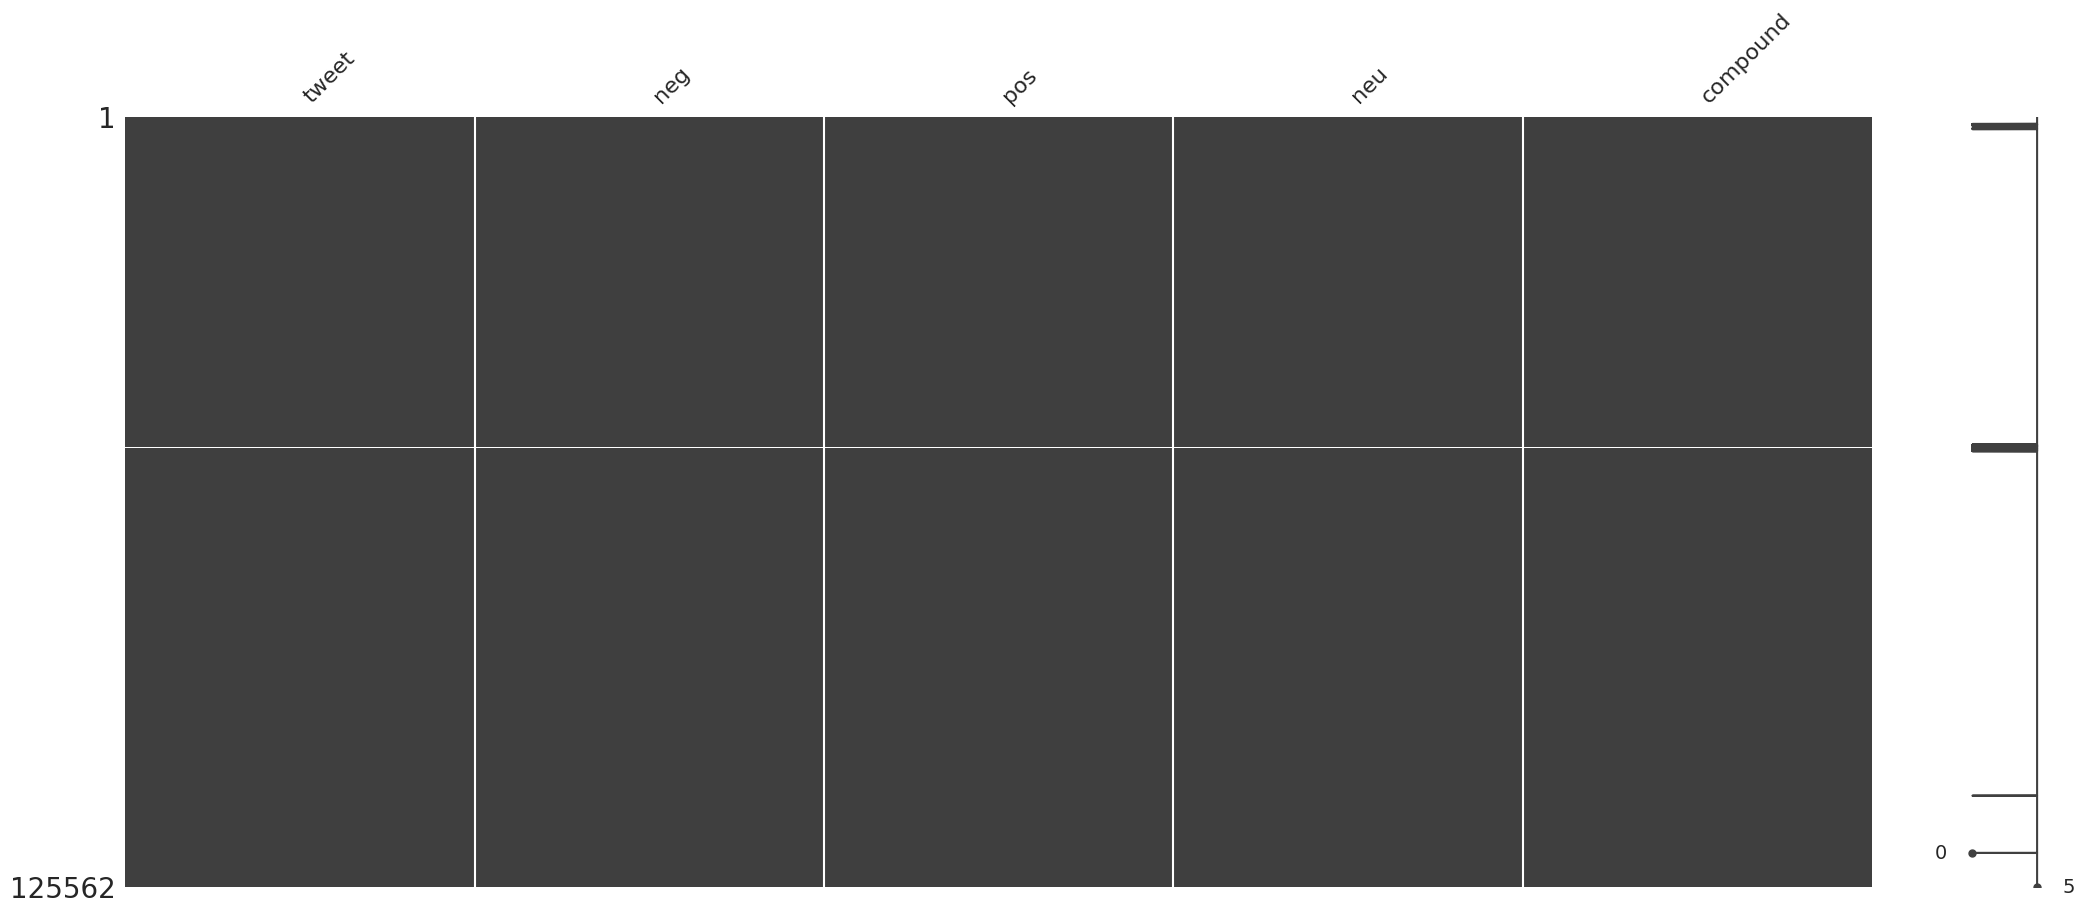

In [27]:
msno.matrix(df_tweets_2022)

Let's deal with those. As there are only a few tweets that didn't match sentiment criteria, we can just remove them.

In [28]:
df_tweets_2022 = df_tweets_2022.dropna()

Now we want to mark each tweet with the emojis that are present in it.

In [29]:
for emoji in emojis:
    df_tweets_2022[emoji] = df_tweets_2022['tweet'].map(lambda x: contains_emoji(x, emoji))

Finally, we can calculate the 2022 sentiment for each emoji.

In [30]:
df_emojis_reduced[['neg_2022', 'pos_2022', 'neu_2022', 'compound_2022']] = 0, 0, 0, 0

for emoji in emojis:
    df_sentiments = df_tweets_2022[df_tweets_2022[emoji] == True][['neg', 'pos', 'neu', 'compound']]
    sentiments = df_sentiments.mean().tolist()
    idx = df_emojis_reduced.index[df_emojis_reduced['Emoji'] == emoji].tolist()[0]
    df_emojis_reduced.loc[idx, 'neg_2022'] = sentiments[0]
    df_emojis_reduced.loc[idx, 'pos_2022'] = sentiments[1]
    df_emojis_reduced.loc[idx, 'neu_2022'] = sentiments[2]
    df_emojis_reduced.loc[idx, 'compound_2022'] = sentiments[3]
df_emojis_reduced.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name,Rank_2019,Rank_Change,neg_2018,pos_2018,neu_2018,compound_2018,neg_2022,pos_2022,neu_2022,compound_2022
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy,1,0,0.094626,0.782723,0.122609,0.045362,0.079562,0.775267,0.145171,0.116471
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart,2,0,0.028128,0.707111,0.264762,0.366035,0.023553,0.734860,0.241590,0.352861
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing,4,1,0.101268,0.779540,0.119193,0.025818,0.080910,0.780651,0.138447,0.098888
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up,10,6,0.029890,0.718746,0.251195,0.325941,0.032314,0.699327,0.268371,0.350401
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face,8,3,0.100978,0.756502,0.142374,0.072759,0.091101,0.758318,0.150578,0.114895


## Results

### Manual Inspection

Excitingly, we can move on to results. We want to find the emojis that changed in use the most.

To start with, we should calculate deltas. We want the absolute value of the difference in sentiment, as we are concentrating on the magnitude of change, not the direction of change.

In [31]:
df_emojis_reduced['neu_change'] = abs(df_emojis_reduced['neu_2018'] - df_emojis_reduced['neu_2022'])
df_emojis_reduced['pos_change'] = abs(df_emojis_reduced['pos_2018'] - df_emojis_reduced['pos_2022'])
df_emojis_reduced['neg_change'] = abs(df_emojis_reduced['neg_2018'] - df_emojis_reduced['neg_2022'])
df_emojis_reduced['compound_change'] = abs(df_emojis_reduced['compound_2018'] - df_emojis_reduced['compound_2022'])
df_emojis_reduced.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name,Rank_2019,Rank_Change,neg_2018,...,neu_2018,compound_2018,neg_2022,pos_2022,neu_2022,compound_2022,neu_change,pos_change,neg_change,compound_change
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy,1,0,0.094626,...,0.122609,0.045362,0.079562,0.775267,0.145171,0.116471,0.022561,0.007456,0.015063,0.071109
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart,2,0,0.028128,...,0.264762,0.366035,0.023553,0.734860,0.241590,0.352861,0.023171,0.027749,0.004575,0.013173
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing,4,1,0.101268,...,0.119193,0.025818,0.080910,0.780651,0.138447,0.098888,0.019254,0.001111,0.020358,0.073070
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up,10,6,0.029890,...,0.251195,0.325941,0.032314,0.699327,0.268371,0.350401,0.017176,0.019419,0.002424,0.024460
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face,8,3,0.100978,...,0.142374,0.072759,0.091101,0.758318,0.150578,0.114895,0.008204,0.001816,0.009877,0.042135


It would be nice to use the emojis in the graphs we're going to generate. Unfortunately, not all default fonts have support for all the emojis used. That means that some readers will see blank squares, and other readers will see the emojis themselves. To mitigate this problem, we can download images for the emojis and save them according to their Unicode tag. That will allow us to use them easily in our visualisations. Luckily for you, we've already downloaded the required images. To use them, we need to convert the Hex code of each emoji to its Unicode.

In [33]:
import re

def to_unicode(hex):
    u = re.sub("\\\\", "", hex) # remove '\' characters. It needs to be escaped like this for the regex engin to correctly recognise it
    u = re.sub("x{", "", u) # remove the 'x{' section from the string
    return u[0:-1] # remove the last character, '}'

df_emojis_reduced['Unicode'] = df_emojis_reduced['Hex'].map(lambda x: to_unicode(x))
df_emojis_reduced.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name,Rank_2019,Rank_Change,neg_2018,...,compound_2018,neg_2022,pos_2022,neu_2022,compound_2022,neu_change,pos_change,neg_change,compound_change,Unicode
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy,1,0,0.094626,...,0.045362,0.079562,0.775267,0.145171,0.116471,0.022561,0.007456,0.015063,0.071109,1F602
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart,2,0,0.028128,...,0.366035,0.023553,0.734860,0.241590,0.352861,0.023171,0.027749,0.004575,0.013173,2764 FE0F
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing,4,1,0.101268,...,0.025818,0.080910,0.780651,0.138447,0.098888,0.019254,0.001111,0.020358,0.073070,1F923
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up,10,6,0.029890,...,0.325941,0.032314,0.699327,0.268371,0.350401,0.017176,0.019419,0.002424,0.024460,1F44D
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face,8,3,0.100978,...,0.072759,0.091101,0.758318,0.150578,0.114895,0.008204,0.001816,0.009877,0.042135,1F62D


Let's grab emojis with top 10 biggest changes in each category.

In [34]:
top_neu = df_emojis_reduced.sort_values(by='neu_change', ascending=False).head(10)
top_neg = df_emojis_reduced.sort_values(by='neg_change', ascending=False).head(10)
top_pos = df_emojis_reduced.sort_values(by='pos_change', ascending=False).head(10)
top_compound = df_emojis_reduced.sort_values(by='compound_change', ascending=False).head(10)

Let's create a visualisation for each category. We want to include as much information as possible. For that reason, we'll create a custom visualisation. We want to indicate the change in sentiment from 2018 to 2022, which we can do using an arrow pointing in the direction of change. We also want to include the change in every sentiment category in every graph, as it allows us to make more meaningful conclusions.

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
sns.set_theme()
sns.set_style("white")

# setting up constants to use in the visualisation
neu_colour = '#05B2DC'
neg_colour = '#EF3E36'
pos_colour = '#09BC8A'
compound_colour = '#FFBC42'
colours = {'neu': neu_colour, 'pos': pos_colour, 'neg': neg_colour, 'compound': compound_colour}
# position modifier allows every category to have a specific position within a one unit section
position_modifier = {'neu': -0.5, 'pos': -0.166, 'neg': 0.166, 'compound': 0.5}

In [36]:
# this creates an x-axis label from the image of the emoji
def add_emoji_xtick(ax, emoji_unicode, pos):
    arr_img = plt.imread(f"../data/emoji_pictures/{emoji_unicode}.png", format='png') # reading in the image
    imagebox = OffsetImage(arr_img, zoom=0.2) # createsa matplotlib object with the image
    imagebox.image.axes = ax # attaches the image object to our figure's axes
    # wraps the image object in an object that specifies the position
    ab = AnnotationBbox(imagebox, (pos,0),
                        xybox=(0, -7),
                        xycoords=("data", "axes fraction"),
                        boxcoords="offset points",
                        box_alignment=(.5, 1),
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab) # pastes the object on the figure's axes

# display the changes in sentiment for each category
def graph_changes(df, title):
    fig, axs = plt.subplots(1,1)
    for cat in ['neu', 'pos', 'neg', 'compound']:
        for i in range(10):
            row = df.iloc[i]
            # by multiplying i with 3, we put three units between each emoji's data
            axs.plot(3*i + position_modifier[cat], row[f'{cat}_2018'], 'o', color=colours[cat], ms=4) # 2018 value
            axs.arrow(3*i + position_modifier[cat], row[f'{cat}_2018'],  0, row[f'{cat}_2022'] - row[f'{cat}_2018'], color=colours[cat], shape='full', head_width=0.5, length_includes_head=True, head_length=0.01, overhang=1) # arrow = change from 2018 to now
            add_emoji_xtick(axs, row['Unicode'], 3*i) # insert the emoji under its block

    # set no xtick labels, and use the xticks instead for the lines separating the emoji data
    axs.set_xticks([3*i+1.5 for i in range(9)], minor=False)
    axs.set_xticklabels([])
    axs.xaxis.grid(True, which='major')

    axs.set_ylabel('Sentiment Score')
    axs.set_title(title)

    # LEGEND: Place it to the right hand side of the graph
    # first we create "false" lines for a nice legend
    legend_lines = [Line2D([0], [0], color=neu_colour, lw=4),
                    Line2D([0], [0], color=pos_colour, lw=4),
                    Line2D([0], [0], color=neg_colour, lw=4),
                    Line2D([0], [0], color=compound_colour, lw=4)
                    ]
    box = axs.get_position()
    # reduce the size of the graph to be able to fit the legend next to it
    axs.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axs.legend(legend_lines, ['Neutral', 'Positive', 'Negative', 'Compound'], loc='center left', bbox_to_anchor=(1, 0.5))

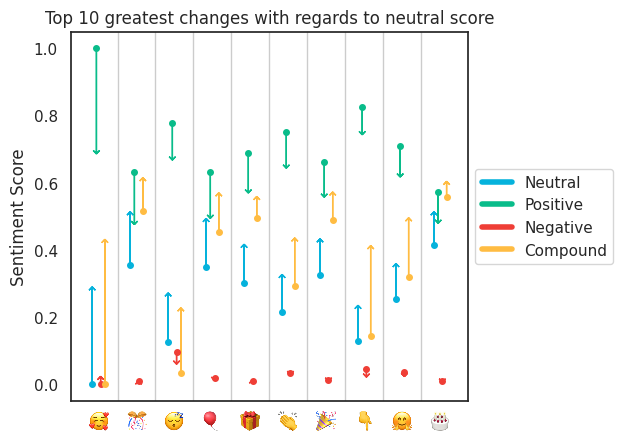

In [37]:
graph_changes(top_neu, "Top 10 greatest changes with regards to neutral score")

Looking at the graph we just created, we can see that all the biggest changes in neutrality were increases. To interpret this, let us consider the emojis present in this top 10. All the emojis seem generally positive, with many of them indicting celebration, love and comfort. For these type of emojis to have been used more neutrally now than before, indicates that people are speaking less passionately and are more subdued. This may be due to emotional burnout, or due to change of use in social media. Over the pandemic, many people felt divided on social media, even more than ever before. This may lead to people being more cautious with what they say online, as they feel less comfortable. Looking at the other score types on this graph, we can see that all the changes in positivity were decreases. This correlates with the interpretation of the changes in neutrality.

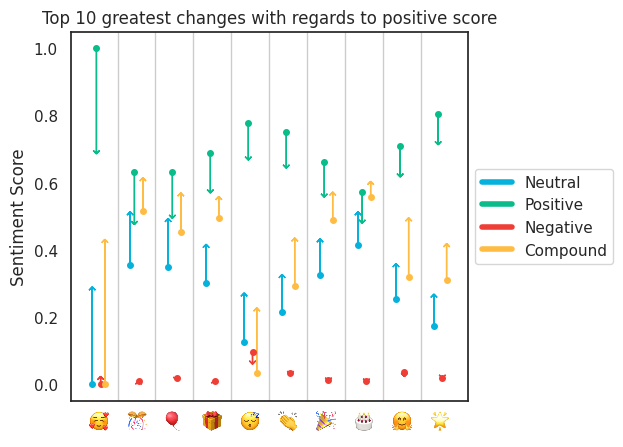

In [38]:
graph_changes(top_pos, "Top 10 greatest changes with regards to positive score")

Considering the top 10 greatest changes in positivity score, we see nearly the exact same set of emojis as with the greatest changes in neutrality. The interpretation of this graph is identical to that of the previous.

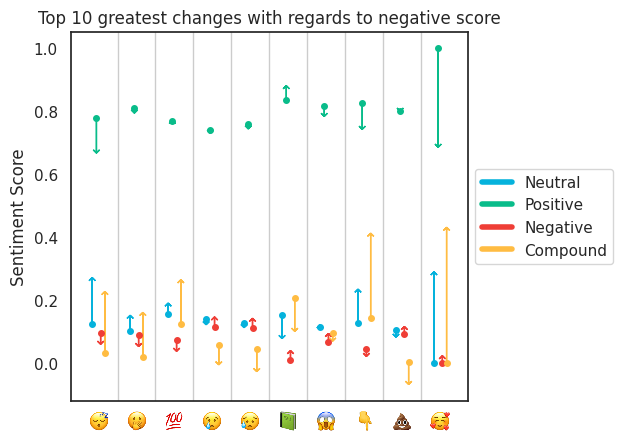

In [39]:
graph_changes(top_neg, "Top 10 greatest changes with regards to negative score")

The greatest changes to the negative score both increases in negativity and decreases in negativity. In general ,the changes are very small. This indicates that the capacity in which we use emojis to communicate negatively has not changed over the pandemic. The emojis themselves cover a wide range, expressing shock, sadness, disdain and discomfort. Interestingly, the school book emoji has seen an increased in negativity. This may indicate that academically people are less happy now than they were before the pandemic. The emojis relating to sadness have increases in negativity, perhaps implying that people are more sad now than they were before. Beyond the changes in the negative score, we can see that the changes in positive score are either negligent or large decreases. Even potentially neutral emojis are being used more negatively now than prior.

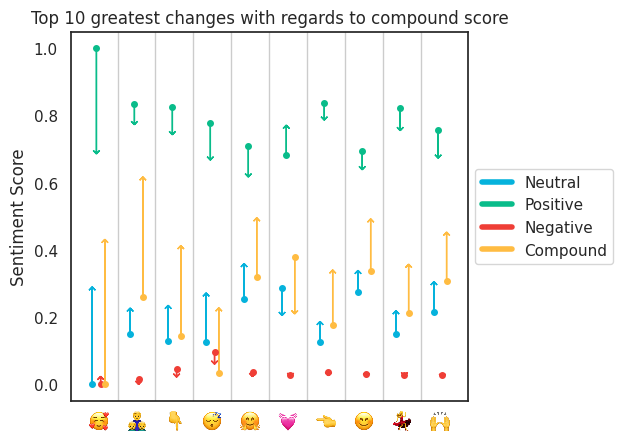

In [40]:
graph_changes(top_compound, "Top 10 greatest changes with regards to compound score")

Finally, looking at the compound score, we see lots of different types of emojis. Clearly, the compound score difference is less distinct than the other groups. The compound score is the normalised sum of the neutral, positive and negative scores. The change in compound score indicates how general emoji use changes, and is less attuned to emotive factors such as with the positive or negative sentiment score groups.


### Trend in changes & Statistical Test

We want to analyse the trend in change as well, and not only focus on individual emojis. First we will need to calculate the changes as positive and negative values. As we are no longer interested in merely the size of the change, we need to adjust our dataframe. We can plot the changes, and judge the trend of change in sentiment.

As we want to determine if the changes in sentiment are significantly large, we can use a Kolmogorov–Smirnov-test to check whether the changes in sentiment are normally distributed or not. A KS-test determines the likelihood of a sample being sampled from a specific distribution. In our case, we will use a standard normal distribution. One of the benefits of using a KS-test is that it is non-parametric. This means we don't need to worry about choosing correct parameter values for the test.

If the sentiment changes are normally distributed, then the changes are not significantly biased towards being more positive or more negative. However, if the changes are not normally distributed, then we can determine the trend of the changes based on the mean of the distribution of the changes.



In [41]:
df_emojis_reduced['neu_change'] = df_emojis_reduced['neu_2022'] - df_emojis_reduced['neu_2018']
df_emojis_reduced['pos_change'] = df_emojis_reduced['pos_2022'] - df_emojis_reduced['pos_2018']
df_emojis_reduced['neg_change'] = df_emojis_reduced['neg_2022'] - df_emojis_reduced['neg_2018']
df_emojis_reduced['compound_change'] = df_emojis_reduced['compound_2022'] - df_emojis_reduced['compound_2018']
df_emojis_reduced.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name,Rank_2019,Rank_Change,neg_2018,...,compound_2018,neg_2022,pos_2022,neu_2022,compound_2022,neu_change,pos_change,neg_change,compound_change,Unicode
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy,1,0,0.094626,...,0.045362,0.079562,0.775267,0.145171,0.116471,0.022561,-0.007456,-0.015063,0.071109,1F602
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart,2,0,0.028128,...,0.366035,0.023553,0.734860,0.241590,0.352861,-0.023171,0.027749,-0.004575,-0.013173,2764 FE0F
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing,4,1,0.101268,...,0.025818,0.080910,0.780651,0.138447,0.098888,0.019254,0.001111,-0.020358,0.073070,1F923
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up,10,6,0.029890,...,0.325941,0.032314,0.699327,0.268371,0.350401,0.017176,-0.019419,0.002424,0.024460,1F44D
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face,8,3,0.100978,...,0.072759,0.091101,0.758318,0.150578,0.114895,0.008204,0.001816,-0.009877,0.042135,1F62D


Let's plot a histogram of the changes in sentiment for each category. By examining the means and tails of the histograms, we can interpret if there is a trend in the sentiment changes.

Text(0.5, 0.92, 'Trend of changes in sentiment score with regards to magnitude and direction')

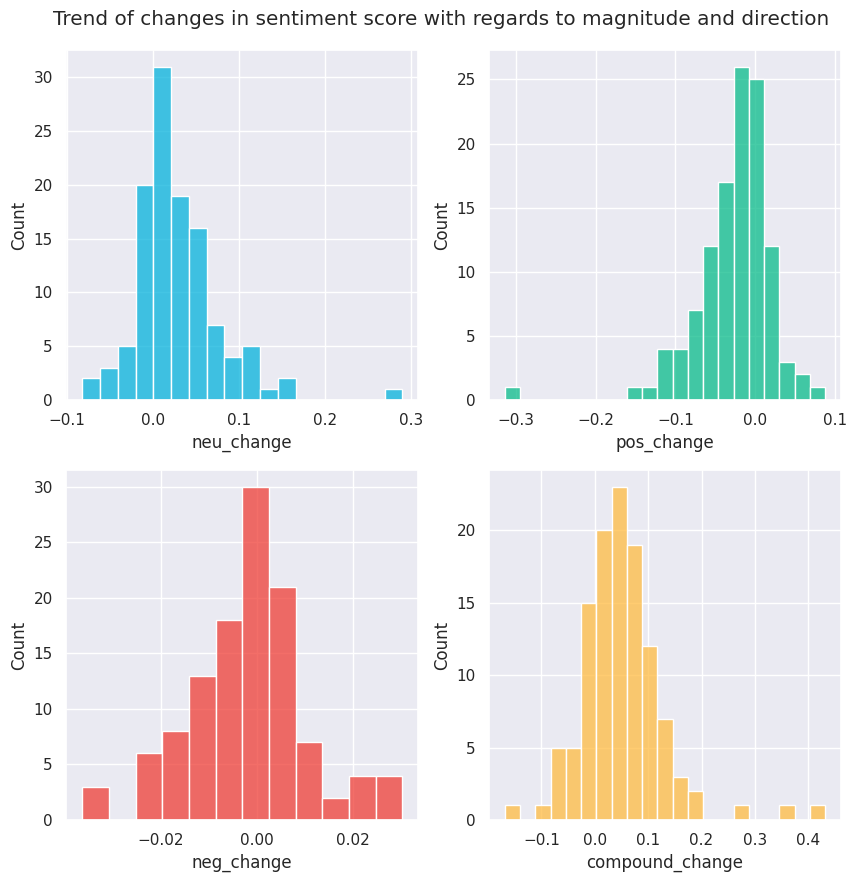

In [89]:
sns.set_theme()
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.histplot(df_emojis_reduced, x='neu_change', color=neu_colour, ax=axs[0,0])
sns.histplot(df_emojis_reduced, x='pos_change', color=pos_colour, ax=axs[0,1])
sns.histplot(df_emojis_reduced, x='neg_change', color=neg_colour, ax=axs[1,0])
sns.histplot(df_emojis_reduced, x='compound_change', color=compound_colour, ax=axs[1,1])
fig.suptitle("Trend of changes in sentiment score with regards to magnitude and direction", y=0.92)

Based off the histograms above, we can see that the changes in different sentiment values follow different trends. The trend in neutral change is slightly positive leaning, with the mean just to the right of zero and the tail on the positive side being much longer than on the left. This indicates a trend of increases in neutrality. The change in positivity has a mean of zero, but has a large tail to the negative side. This indicates that there is a slight trend of decreases in positive sentiment. The negative change histogram has a zero mean distribution, with moderately equal tails to both side, indicating no general trend to either an increase or decrease in negativity. The change in compound score's mean is far to the right, indicating a major trend towards increasing the compound sentiment score. The magnitude of changes is quite small, with the tails of the graph being very short.

Now let's see if the mean in sentiment changes is biased towards any of the categories of emojis. This can give us insight into emoji usage.

Text(0.5, 0.91, 'Trend of changes in sentiment score with regards to the category of emoji')

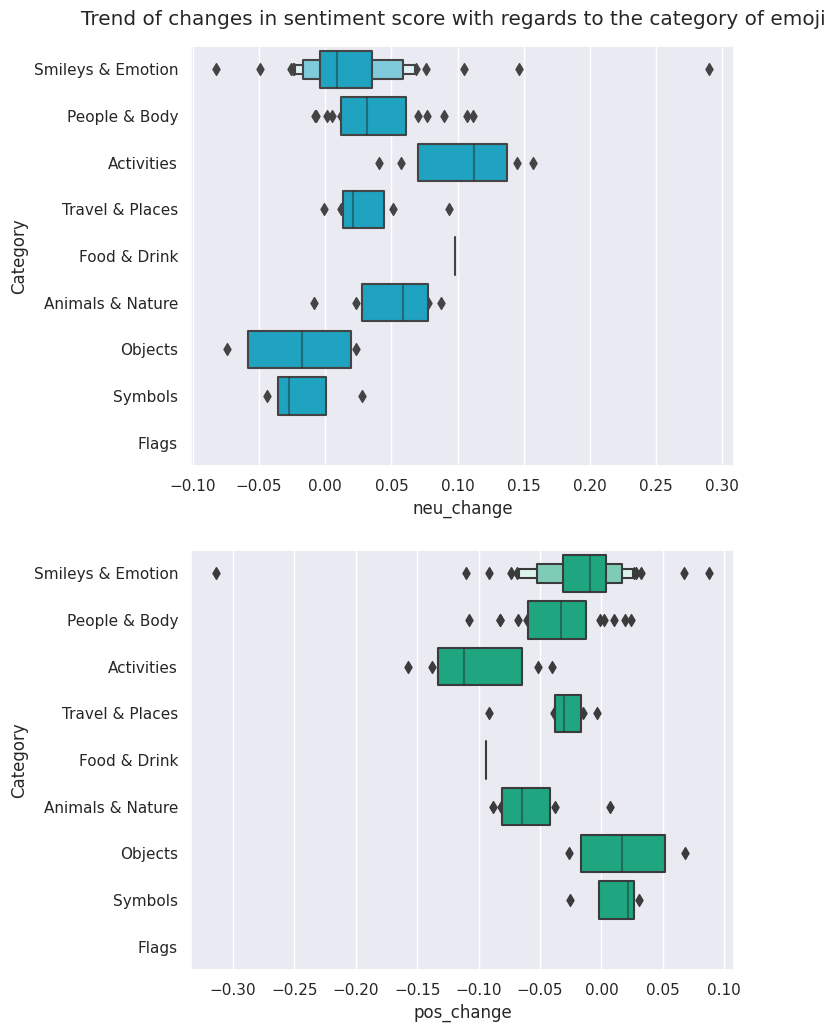

In [116]:
fig, axs = plt.subplots(2,1, figsize=(7,12))
sns.boxenplot(data=df_emojis_reduced, x='neu_change', y='Category', color=neu_colour, ax=axs[0])
sns.boxenplot(data=df_emojis_reduced, x='pos_change', y='Category', color=pos_colour, ax=axs[1])
fig.suptitle("Trend of changes in sentiment score with regards to the category of emoji", y=0.91)

The box plots above indicate that there is a clear bias towards the change in neutral and positive sentiment value based on the category of emoji. In regard to changes in neutrality, all categories indicate increases in neutrality, other than  Objects and Symbols, which bear decreases in neutrality in general. In regard to changes in positive sentiment, we see the opposite behaviour. All categories other than Objects and Symbols have decreases in positivity. This could indicate a relationship between decreases in positivity being swapped for neutrality, and vice versa.

Text(0.5, 0.91, 'Trend of changes in sentiment score with regards to the category of emoji')

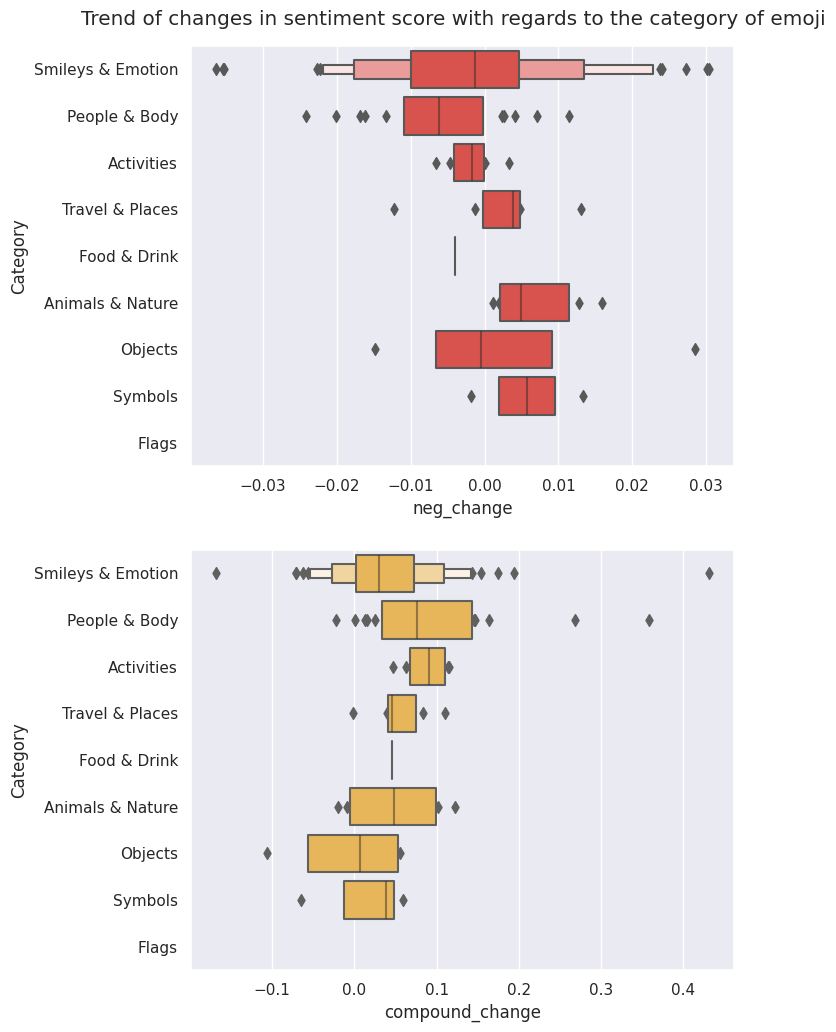

In [118]:
fig, axs = plt.subplots(2,1, figsize=(7,12))
sns.boxenplot(data=df_emojis_reduced, x='neg_change', y='Category', color=neg_colour, ax=axs[0])
sns.boxenplot(data=df_emojis_reduced, x='compound_change', y='Category', color=compound_colour, ax=axs[1])
fig.suptitle("Trend of changes in sentiment score with regards to the category of emoji", y=0.91)

Based on the box plots above, we see far greater spreads of changes across the different categories. Both changes in negative and compound scores have means closer to one another, and wider tails on individual boxes.

Finally, we wish to perform our statistical tests. We will perform a test for each category of sentiment score, and accept or reject our null hypotheses. A null hypotheses for a KS-test is to state that the sample IS representative of the distribution it is being tested against. If we reject the null hypotheses, we are saying that the sample is not likely to have been sampled from the distribution it is being tested against. To accept a null hypotheses, we compare the p-value returned by the test to some value we've chosen. This value is called the confidence level, and we will choose a confidence value of 95%. If our p-value is less than 0.05 (1 - 0.95), we will reject the null hypotheses. If it is not, we will fail to reject the null hypotheses. One does not accept the null hypotheses, you merely fail to prove it wrong.

In [105]:
from scipy.stats import kstest, norm

# Change in neutrality
kstest(df_emojis_reduced['neu_change'].dropna().tolist(), norm.cdf)

KstestResult(statistic=0.4670569715043683, pvalue=1.0304659743116593e-23)

As our p-value is less than 0.05, we reject the null hypotheses. Thus, the changes in neutrality are not normally distributed.

In [106]:
# Change in positivity
kstest(df_emojis_reduced['pos_change'].dropna().tolist(), norm.cdf)

KstestResult(statistic=0.4650992813193692, pvalue=1.6548743233281e-23)

As our p-value is less than 0.05, we reject the null hypotheses. Thus, the changes in positive sentiment score are not normally distributed.

In [107]:
# Change in negativity
kstest(df_emojis_reduced['neg_change'].dropna().tolist(), norm.cdf)

KstestResult(statistic=0.4878819962183162, pvalue=5.709144915145572e-26)

As our p-value is less than 0.05, we reject the null hypotheses. Thus, the changes in negativity are not normally distributed.

In [108]:
# Change in compound score
kstest(df_emojis_reduced['compound_change'].dropna().tolist(), norm.cdf)

KstestResult(statistic=0.4541996992611203, pvalue=2.2105468284221454e-22)

As our p-value is less than 0.05, we reject the null hypotheses. Thus, the changes in compound sentiment score are not normally distributed.

Based on all four tests rejecting the null hypotheses, we can conclude from our statistical tests that the changes in sentiment score do not reflect a normal distribution. That indicates that the changes in emoji sentiment has been significant from before the pandemic to now.

As the statistical tests confirm that the distribution of sentiment changes is not normally distributed, we can use the histograms we created earlier to determine the trend in change of emoji sentiment. Based off our previous analysis of the histograms, we can conclude that in general, emojis were used less positively, and less negatively, in order to be used more neutrally. This shift is reflected in the compound score, which shows that most emojis have a higher compound sentiment score than before, but that the change itself is very small. This is due to the balancing out of the changes in positivity and negativity, and the increase in neutrality biasing the compound score to a slight increase.

# Conclusion

In order to establish whether emoji use has changed due to the COVID-19 pandemic, tweets from before the pandemic, and after the pandemic, are analysed. This analysis includes sentiment analysis, which in turn is analysed by comparing the difference in the general sentiment attached to an emoji before the pandemic, and after it. This analysis finds that the changes in sentiment in regard to emojis are out of the ordinary, which implies that the pandemic did affect the way we use emojis. Furthermore, the analysis finds that in general, people are using emojis more neutrally than before. This may reflect that people are emotionally exhausted, and are emoting less online. This may also reflect a number of unrelated factors; social-media use may be changing, rather than emoji use. However, within the scope of this analysis, it can be confirmed that the way we use emojis has changed during the COVID-19 pandemic.

# Bibliography

**[1] Unicode Subcommittee Emoji Frequency https://home.unicode.org/emoji/emoji-frequency/**
**[2] C. Hutto and E. Gilbert, “VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text”, ICWSM, vol. 8, no. 1, pp. 216-225, May 2014.**
**[3] 2018 Emoji Releases, https://blog.emojipedia.org/157-new-emojis-in-the-final-2018-emoji-list/**